In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_급성심정지환자(발생지기준).csv")
data

,Unnamed: 0,발생년도,환자발생장소_시도,소재지,성별,연령(만),연령대,환자거주지_시도,환자거주지_시군구,발생장소,시행종류
0,0,2018,서울,용산구,여성,83,노년,서울,용산구,비공공장소,NO
1,1,2018,서울,중구,여성,67,노년,서울,중구,비공공장소,NO
2,2,2018,서울,중구,남성,46,중년,서울,노원구,공공장소,NO
3,3,2018,서울,동작구,남성,91,노년,서울,동작구,비공공장소,CPR
4,4,2018,서울,동작구,여성,61,장년,서울,동작구,비공공장소,CPR
...,...,...,...,...,...,...,...,...,...,...,...
13408,13408,2020,서울,성동구,남성,79,노년,서울,성동구,미상,NO
13409,13409,2020,서울,성동구,남성,37,중년,경기,수원시 장안구,미상,NO
13410,13410,2020,서울,성동구,남성,67,노년,서울,성동구,비공공장소,NO
13411,13411,2020,서울,성동구,여성,68,노년,서울,성동구,미상,NO


In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
data

,발생년도,환자발생장소_시도,소재지,성별,연령(만),연령대,환자거주지_시도,환자거주지_시군구,발생장소,시행종류
0,2018,서울,용산구,여성,83,노년,서울,용산구,비공공장소,NO
1,2018,서울,중구,여성,67,노년,서울,중구,비공공장소,NO
2,2018,서울,중구,남성,46,중년,서울,노원구,공공장소,NO
3,2018,서울,동작구,남성,91,노년,서울,동작구,비공공장소,CPR
4,2018,서울,동작구,여성,61,장년,서울,동작구,비공공장소,CPR
...,...,...,...,...,...,...,...,...,...,...
13408,2020,서울,성동구,남성,79,노년,서울,성동구,미상,NO
13409,2020,서울,성동구,남성,37,중년,경기,수원시 장안구,미상,NO
13410,2020,서울,성동구,남성,67,노년,서울,성동구,비공공장소,NO
13411,2020,서울,성동구,여성,68,노년,서울,성동구,미상,NO


In [5]:
data.groupby('소재지').count()[['발생년도']]

,발생년도
소재지,
강남구,662
강동구,586
강북구,564
강서구,743
관악구,593
광진구,491
구로구,557
금천구,336
노원구,775


In [6]:
# arrest: 구 별로 심정지환자 수 count
arrest = data.groupby('소재지').count()[['발생년도']]
arrest.reset_index(inplace=True)
arrest.rename(columns={'발생년도': '구별 심정지환자수(발생지기준)'}, inplace=True)
arrest

,소재지,구별 심정지환자수(발생지기준)
0,강남구,662
1,강동구,586
2,강북구,564
3,강서구,743
4,관악구,593
5,광진구,491
6,구로구,557
7,금천구,336
8,노원구,775
9,도봉구,552


In [7]:
# arrest.to_csv('D:/MultiCampus/DATAexam/전공프로젝트/23_(코드,데이터)-20221224T082729Z-001/시각화용_급성심정지환자수.csv',
#                index=False, encoding='utf-8-sig')

In [8]:
# 그래프 시각화 라이브러리 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import pandas as pd
import seaborn as sns
import numpy as np
import folium
import json

# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline 
#그래프는 show()함수를 통해서 독립창에서 실행되는 것이 원칙
#그래프를 콘솔에서 바로 작도되록 하는 설정

In [9]:
population = pd.read_csv("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울특별시(구별)_18_19_20주민등록인구.csv")

In [10]:
# population: 구별 거주인구 평균
population = population.sort_values('소재지')
population.reset_index(inplace=True)
population.drop('index', axis=1, inplace=True)
population.head()

,소재지,2018,2019,2020,구별 거주인구 평균
0,강남구,547453,550209,544055,547239.000000
1,강동구,431920,440390,463998,445436.000000
2,강북구,322915,317695,311569,317393.000000
3,강서구,603611,598273,585901,595928.333333
4,관악구,520040,517334,509803,515725.666667


In [11]:
# population.to_csv('D:/MultiCampus/DATAexam/전공프로젝트/23_(코드,데이터)-20221224T082729Z-001/시각화용_거주인구.csv',
#                    index=False, encoding='utf-8-sig')

In [12]:
senior = pd.read_csv("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_노인인구.csv") 

In [13]:
# senior: 노인인구 비율
senior = senior.sort_values('소재지')
senior.reset_index(inplace=True)
senior.drop('index', axis=1, inplace=True)
senior.drop('Unnamed: 0', axis=1, inplace=True)
senior

,동별(1),소재지,2018년전체인구,2018년노인인구,2019년전체인구,2019년노인인구,2020년전체인구,2020년노인인구,2018년노인인구비율,2019년노인인구비율,2020년노인인구비율,노인인구비율
0,합계,강남구,547453,66957,550209,70896,544055,74959,0.122306,0.128853,0.137778,0.129646
1,합계,강동구,431920,58669,440390,63341,463998,69903,0.135833,0.143829,0.150654,0.143439
2,합계,강북구,322915,58103,317695,60474,311569,63313,0.179933,0.190352,0.203207,0.191164
3,합계,강서구,603611,79445,598273,83839,585901,88733,0.131616,0.140135,0.151447,0.141066
4,합계,관악구,520040,71888,517334,74787,509803,78430,0.138236,0.144562,0.153844,0.145547
5,합계,광진구,371063,45432,366972,47681,360109,50311,0.122437,0.129931,0.139710,0.130693
6,합계,구로구,438486,61105,439371,64932,432488,69201,0.139355,0.147784,0.160007,0.149048
7,합계,금천구,254021,35354,251820,37196,247835,39314,0.139177,0.147709,0.158630,0.148505
8,합계,노원구,548160,77032,537303,80854,527032,85420,0.140528,0.150481,0.162077,0.151029
9,합계,도봉구,341649,55926,335631,58664,327361,62009,0.163694,0.174787,0.189421,0.175967


<AxesSubplot:xlabel='소재지', ylabel='구별 심정지환자수(발생지기준)'>

<AxesSubplot:xlabel='소재지', ylabel='구별 거주인구 평균'>

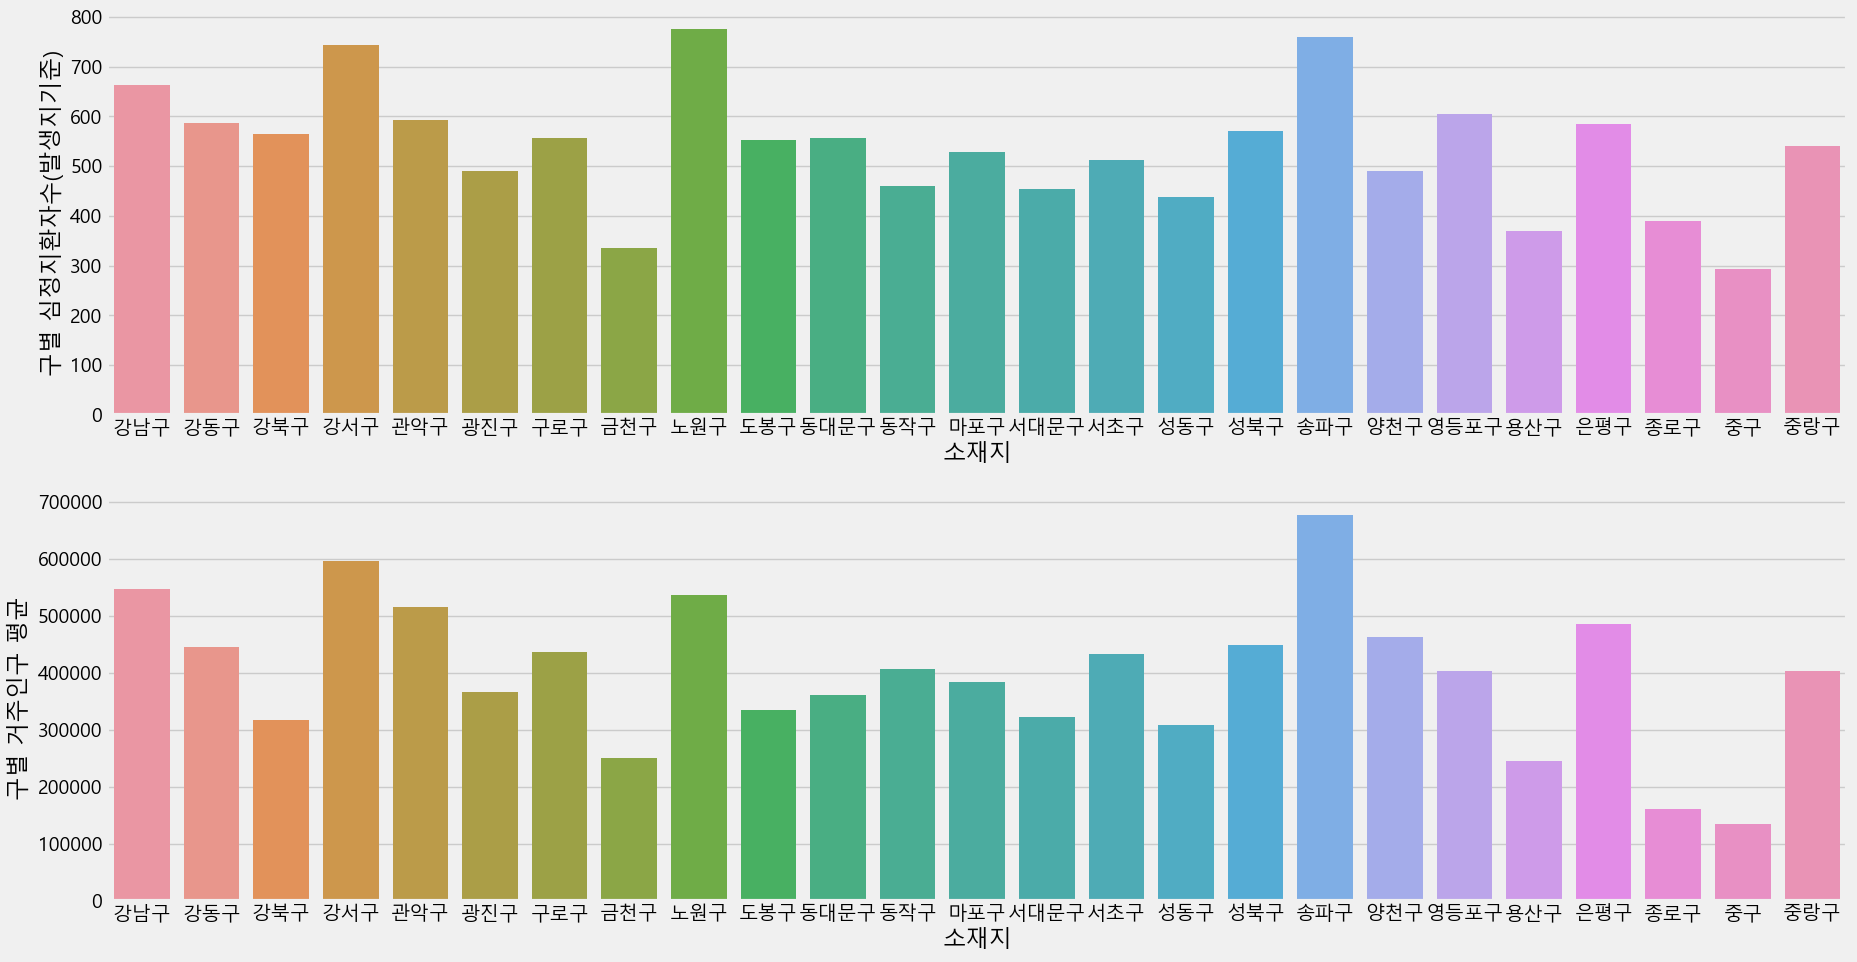

In [14]:

# 한글 깨짐 현상을 방지하기 위해 맑은고딕 폰트와 - 부호 설정
rc('font', family = "Malgun Gothic")
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 스타일 설정
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(nrows=2, figsize=(20,11))
# 그래프 그리기 
sns.barplot(data=arrest, x='소재지', y='구별 심정지환자수(발생지기준)', ax=ax[0])
sns.barplot(data=population, x='소재지', y='구별 거주인구 평균', ax=ax[1])

# 저장 후 주석처리 
# plt.savefig("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_노인인구그래프.png")
plt.show()

In [15]:
# 심정지환자수와 거주인구는 강한 상관관계
corr = arrest[['구별 심정지환자수(발생지기준)']]
corr['구별 거주인구 평균'] = population['구별 거주인구 평균']
corr.corr()

,구별 심정지환자수(발생지기준),구별 거주인구 평균
구별 심정지환자수(발생지기준),1.000000,0.894634
구별 거주인구 평균,0.894634,1.000000


<AxesSubplot:xlabel='소재지', ylabel='구별 거주인구 평균'>

<AxesSubplot:xlabel='소재지', ylabel='구별 심정지환자수(발생지기준)'>

<AxesSubplot:xlabel='소재지', ylabel='노인인구비율'>

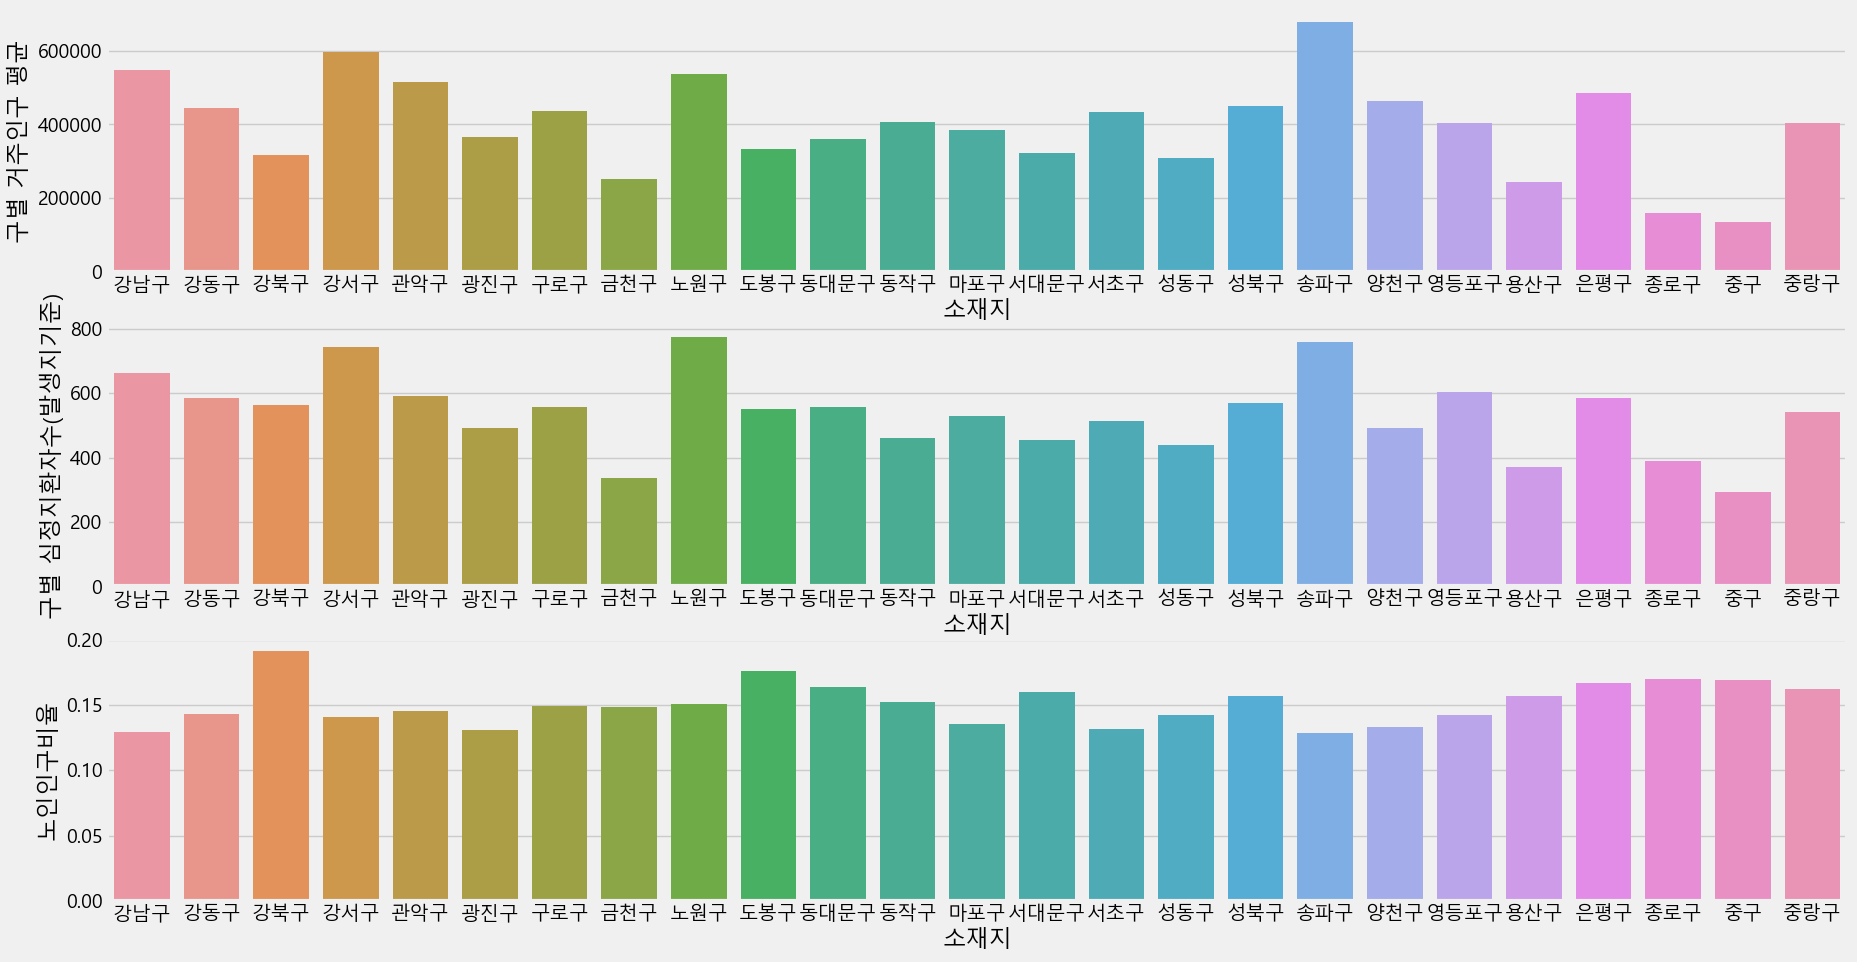

In [16]:

# 한글 깨짐 현상을 방지하기 위해 맑은고딕 폰트와 - 부호 설정
rc('font', family = "Malgun Gothic")
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 스타일 설정
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(nrows=3, figsize=(20,11))
# 그래프 그리기 
sns.barplot(data=population, x='소재지', y='구별 거주인구 평균', ax=ax[0])
sns.barplot(data=arrest, x='소재지', y='구별 심정지환자수(발생지기준)', ax=ax[1])
sns.barplot(data=senior, x='소재지', y='노인인구비율', ax=ax[2])

# 저장 후 주석처리 
# plt.savefig("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_노인인구그래프.png")
plt.show()

In [17]:
# 심정지환자수와 노인인구는 상관관계 x
corr['노인인구비율'] = senior['노인인구비율']
corr.corr()

,구별 심정지환자수(발생지기준),구별 거주인구 평균,노인인구비율
구별 심정지환자수(발생지기준),1.000000,0.894634,-0.290575
구별 거주인구 평균,0.894634,1.000000,-0.542896
노인인구비율,-0.290575,-0.542896,1.000000


In [18]:
arrest_age = data.groupby('연령(만)').count()[['발생년도']]
arrest_age.rename(columns={'발생년도' : '연령별 환자 수'}, inplace=True)
arrest_age.reset_index(inplace=True)
arrest_age

,연령(만),연령별 환자 수
0,0,73
1,1,11
2,2,11
3,3,8
4,4,5
...,...,...
102,102,4
103,103,1
104,104,3
105,105,1


In [19]:
def age_sort(num):
    if num<=5:
        return '영/유아'
    elif num<=12:
        return '아동'
    elif num<=18:
        return '청소년'
    elif num<=29:
        return '청년'
    elif num<=49:
        return '중년'
    elif num<=64:
        return '장년'
    else:
        return '노년'

In [20]:
arrest_age['연령대'] = arrest_age['연령(만)'].apply(lambda x: age_sort(x))
arrest_age

,연령(만),연령별 환자 수,연령대
0,0,73,영/유아
1,1,11,영/유아
2,2,11,영/유아
3,3,8,영/유아
4,4,5,영/유아
...,...,...,...
102,102,4,노년
103,103,1,노년
104,104,3,노년
105,105,1,노년


In [21]:
arrest_age_pt = pd.pivot_table(data=arrest_age,
              index='연령대',
              values='연령별 환자 수',
              aggfunc='sum')

In [22]:
# 연령대별 count
arrest_age_pt.sort_values('연령별 환자 수', inplace=True)
arrest_age_pt

,연령별 환자 수
연령대,
아동,29
청소년,103
영/유아,112
청년,441
중년,1565
장년,3109
노년,8054


<Figure size 2000x1000 with 0 Axes>

<AxesSubplot:xlabel='연령대', ylabel='연령별 환자 수'>

Text(0.5, 1.0, '연령대별 급성심장정지 환자 수')

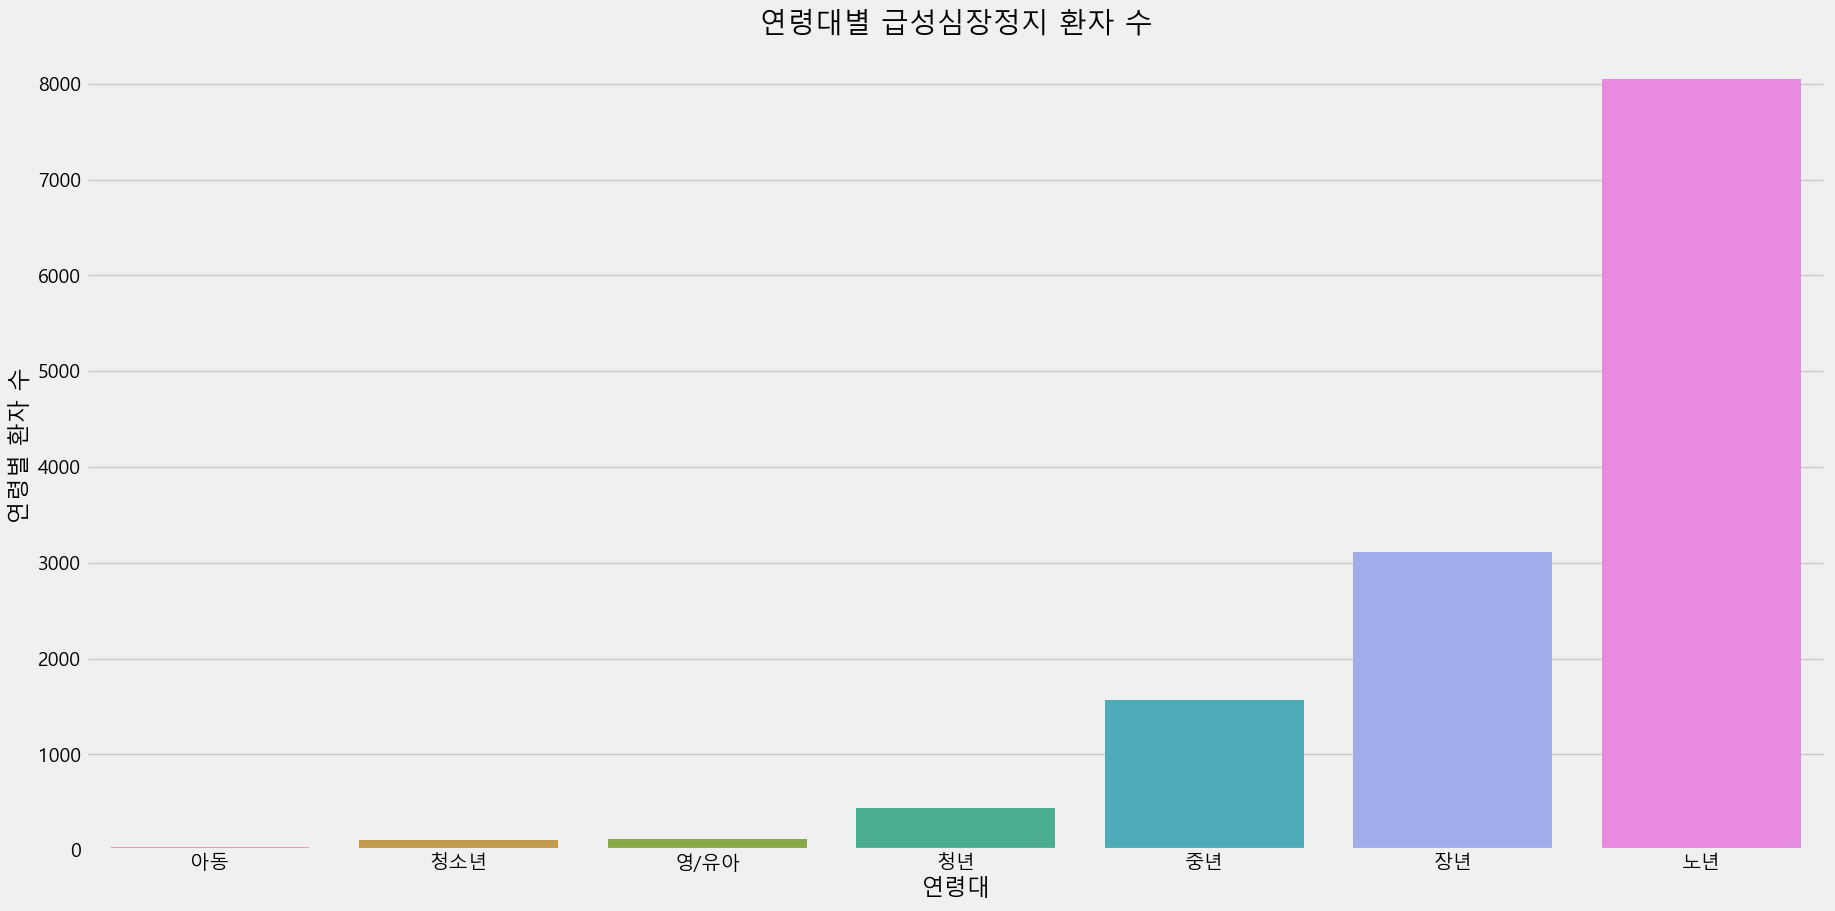

In [23]:

# 한글 깨짐 현상을 방지하기 위해 맑은고딕 폰트와 - 부호 설정
rc('font', family = "Malgun Gothic")
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 스타일 설정
plt.style.use('fivethirtyeight')

# 그래프 그리기 
plt.figure(figsize=(20,10))
sns.barplot(data=arrest_age_pt, x=arrest_age_pt.index, y='연령별 환자 수')
plt.title('연령대별 급성심장정지 환자 수')

# 저장 후 주석처리 
# plt.savefig("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_노인인구그래프.png")
plt.show()

# 노인인구 비율이 아닌 노인인구 18~20 합계로 계산

In [24]:
senior['2018~2020 노인인구합계'] = senior['2018년노인인구'] + senior['2019년노인인구']+ senior['2020년노인인구']
senior

,동별(1),소재지,2018년전체인구,2018년노인인구,2019년전체인구,2019년노인인구,2020년전체인구,2020년노인인구,2018년노인인구비율,2019년노인인구비율,2020년노인인구비율,노인인구비율,2018~2020 노인인구합계
0,합계,강남구,547453,66957,550209,70896,544055,74959,0.122306,0.128853,0.137778,0.129646,212812
1,합계,강동구,431920,58669,440390,63341,463998,69903,0.135833,0.143829,0.150654,0.143439,191913
2,합계,강북구,322915,58103,317695,60474,311569,63313,0.179933,0.190352,0.203207,0.191164,181890
3,합계,강서구,603611,79445,598273,83839,585901,88733,0.131616,0.140135,0.151447,0.141066,252017
4,합계,관악구,520040,71888,517334,74787,509803,78430,0.138236,0.144562,0.153844,0.145547,225105
5,합계,광진구,371063,45432,366972,47681,360109,50311,0.122437,0.129931,0.139710,0.130693,143424
6,합계,구로구,438486,61105,439371,64932,432488,69201,0.139355,0.147784,0.160007,0.149048,195238
7,합계,금천구,254021,35354,251820,37196,247835,39314,0.139177,0.147709,0.158630,0.148505,111864
8,합계,노원구,548160,77032,537303,80854,527032,85420,0.140528,0.150481,0.162077,0.151029,243306
9,합계,도봉구,341649,55926,335631,58664,327361,62009,0.163694,0.174787,0.189421,0.175967,176599


In [25]:
# senior.to_csv('D:/MultiCampus/DATAexam/전공프로젝트/23_(코드,데이터)-20221224T082729Z-001/시각화용_노인인구.csv',
#                index=False, encoding='utf-8-sig')

<AxesSubplot:xlabel='소재지', ylabel='구별 거주인구 평균'>

<AxesSubplot:xlabel='소재지', ylabel='구별 심정지환자수(발생지기준)'>

<AxesSubplot:xlabel='소재지', ylabel='2018~2020 노인인구합계'>

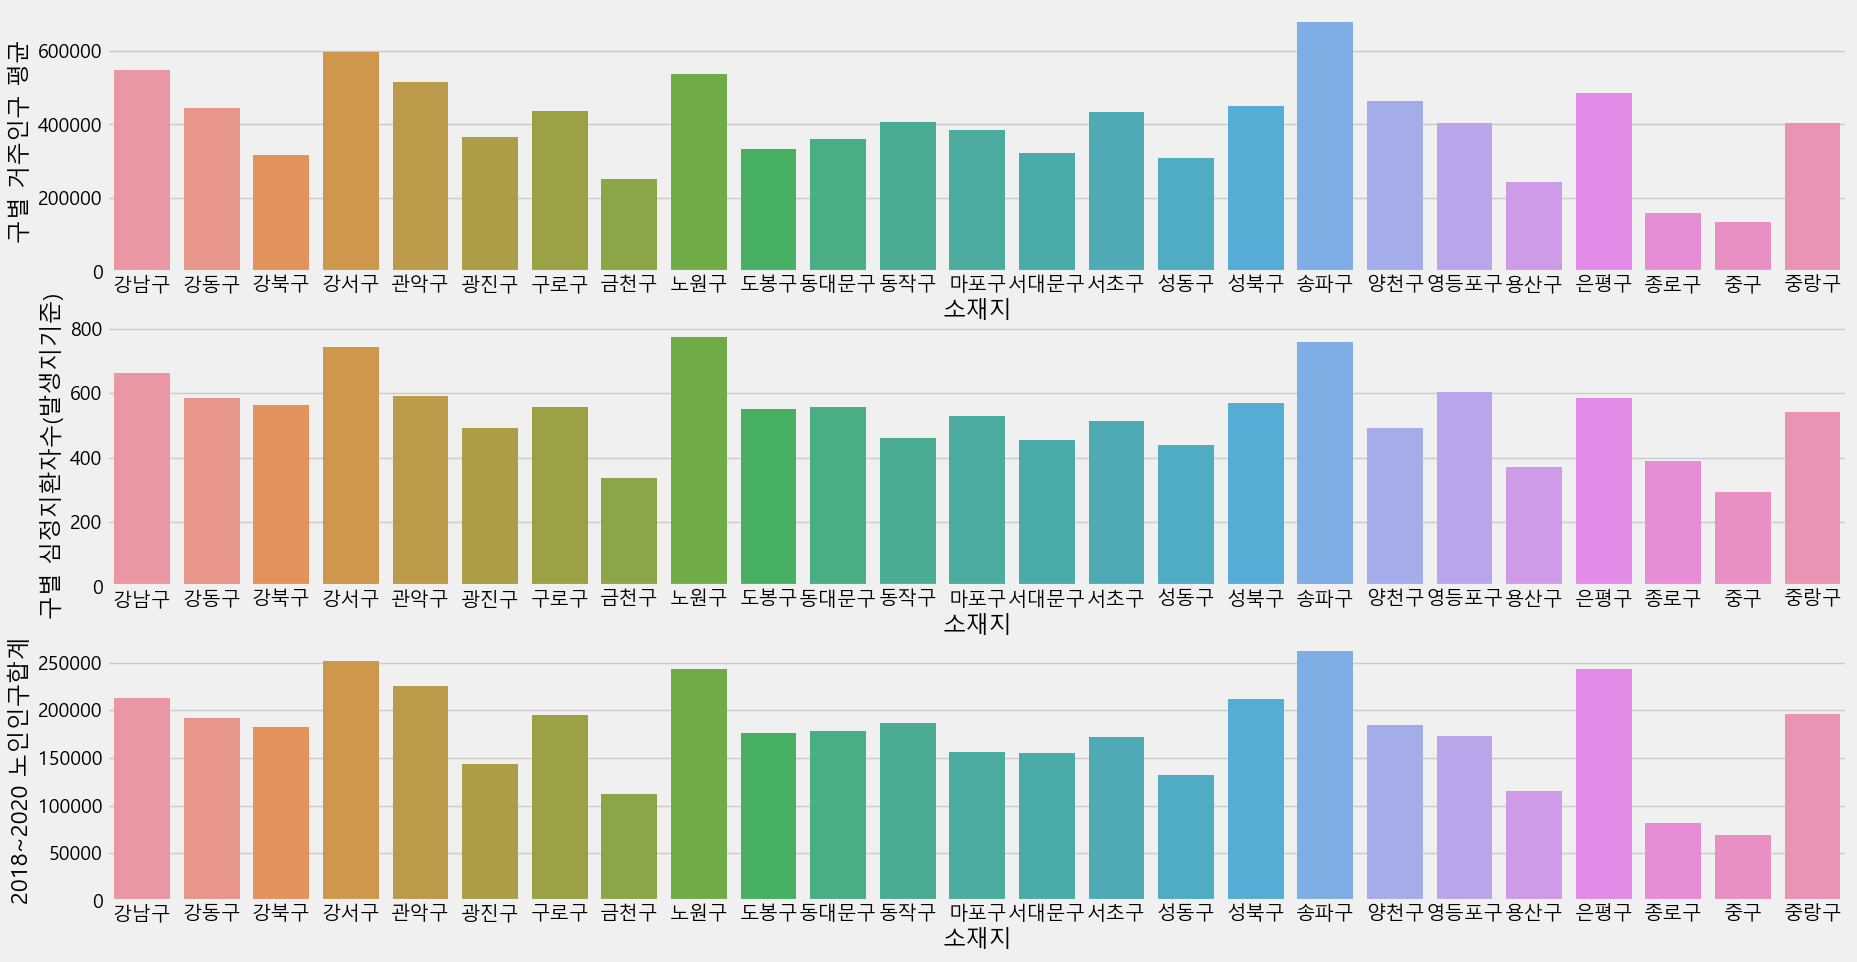

In [26]:

# 한글 깨짐 현상을 방지하기 위해 맑은고딕 폰트와 - 부호 설정
rc('font', family = "Malgun Gothic")
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 스타일 설정
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(nrows=3, figsize=(20,11))
# 그래프 그리기 
sns.barplot(data=population, x='소재지', y='구별 거주인구 평균', ax=ax[0])
sns.barplot(data=arrest, x='소재지', y='구별 심정지환자수(발생지기준)', ax=ax[1])
sns.barplot(data=senior, x='소재지', y='2018~2020 노인인구합계', ax=ax[2])

# 저장 후 주석처리 
# plt.savefig("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_노인인구그래프.png")
plt.show()

In [27]:
# 심정지환자수, 거주인구, 노인인구와 강한 양의 상관관계 입증
corr.drop('노인인구비율', axis=1, inplace=True)
corr['2018~2020 노인인구합계'] = senior['2018~2020 노인인구합계']
corr.corr()

,구별 심정지환자수(발생지기준),구별 거주인구 평균,2018~2020 노인인구합계
구별 심정지환자수(발생지기준),1.000000,0.894634,0.910057
구별 거주인구 평균,0.894634,1.000000,0.944671
2018~2020 노인인구합계,0.910057,0.944671,1.000000


In [28]:
inner_300m_count = pd.read_csv("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/지하철역에서_가까운_AED_inner300m_개수_소재지추가.csv")
inner_300m_count

,역이름,300m 이내 AED 개수,주소,소재지
0,낙성대역,7,서울 관악구 남부순환로 지하 1928,관악구
1,구룡역,3,서울 강남구 개포로 지하 403,강남구
2,서울대입구역,4,서울 관악구 남부순환로 지하 1822,관악구
3,불광역,5,서울 은평구 통일로 지하 723-1,은평구
4,안국역,10,서울 종로구 율곡로 지하 62,종로구
...,...,...,...,...
291,언주역,1,서울 강남구 봉은사로 지하 201,강남구
292,종각역,5,서울 종로구 종로 지하 55,종로구
293,화계역,3,서울 강북구 삼양로 341,강북구
294,삼양역,11,서울 강북구 삼양로 지하 259,강북구


In [29]:
inner_300m_count_pt = inner_300m_count.pivot_table(index = '소재지',
                             values = '300m 이내 AED 개수',
                             aggfunc = 'mean')

In [30]:
# inner_300m_count_pt: 구별 300m 이내 평균 AED 개수
inner_300m_count_pt.reset_index(inplace=True)
inner_300m_count_pt

,소재지,300m 이내 AED 개수
0,강남구,5.296296
1,강동구,7.166667
2,강북구,7.181818
3,강서구,3.611111
4,관악구,5.500000
5,광진구,6.111111
6,구로구,4.272727
7,금천구,5.333333
8,노원구,5.538462
9,도봉구,5.500000


<AxesSubplot:xlabel='소재지', ylabel='구별 심정지환자수(발생지기준)'>

<AxesSubplot:xlabel='소재지', ylabel='300m 이내 AED 개수'>

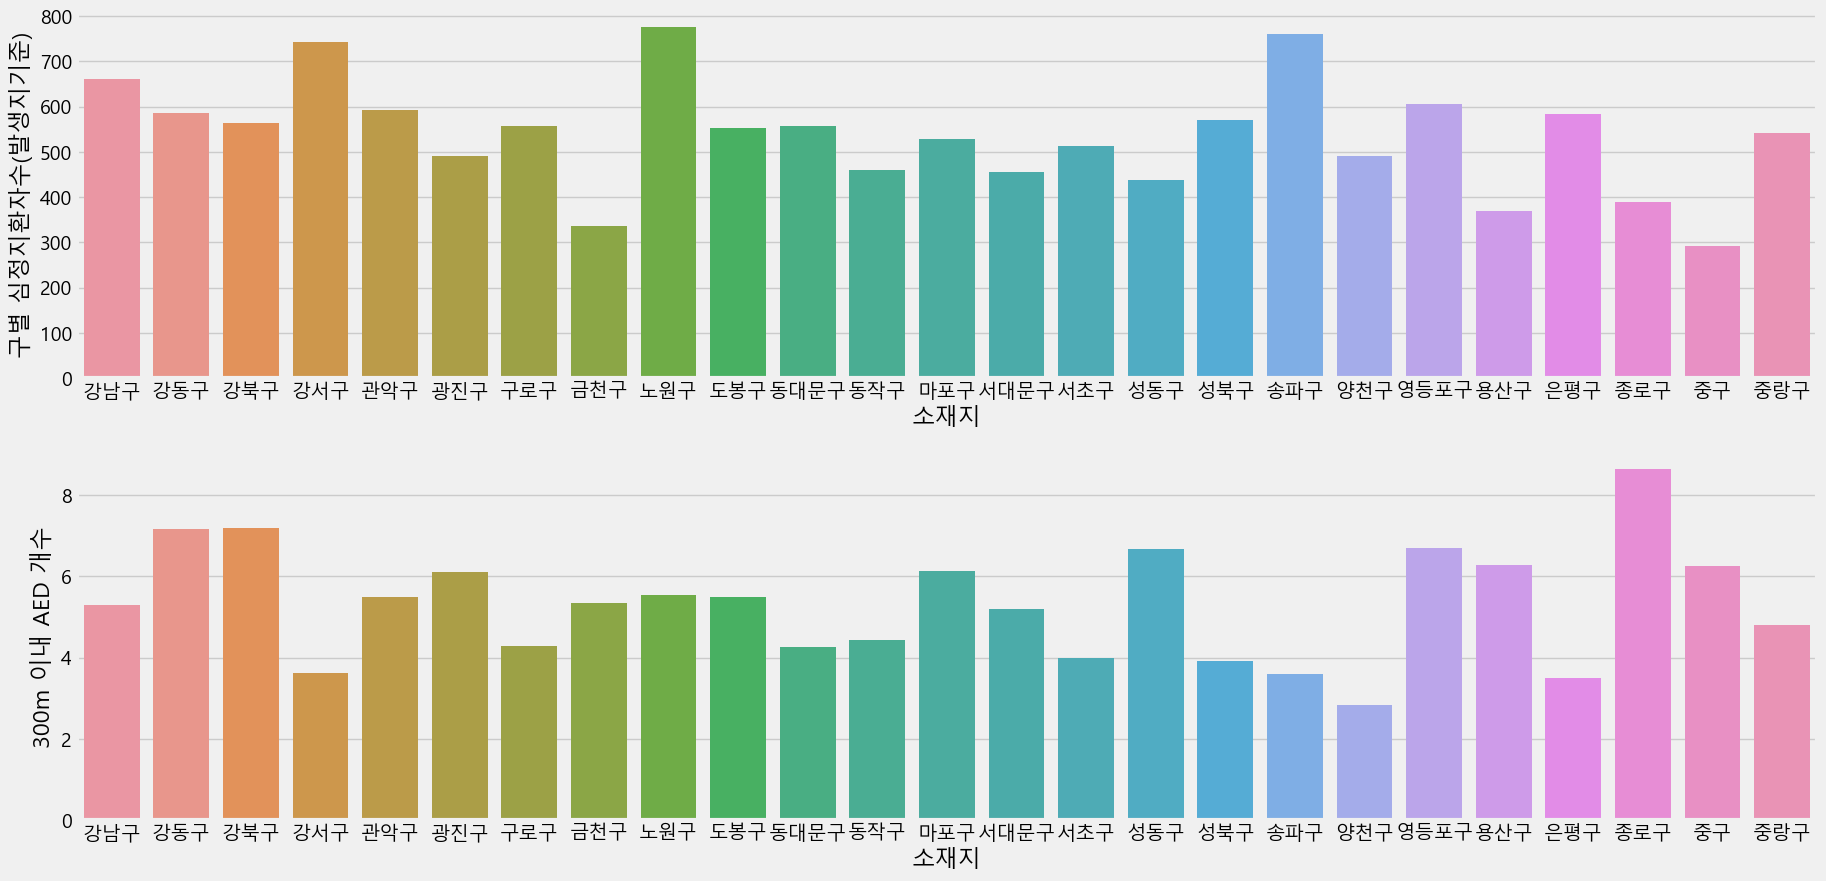

In [31]:

# 한글 깨짐 현상을 방지하기 위해 맑은고딕 폰트와 - 부호 설정
rc('font', family = "Malgun Gothic")
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 스타일 설정
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(nrows=2, figsize=(20,10))
# 그래프 그리기 
sns.barplot(data=arrest, x='소재지', y='구별 심정지환자수(발생지기준)', ax=ax[0])
sns.barplot(data=inner_300m_count_pt, x='소재지', y='300m 이내 AED 개수', ax=ax[1])

# 저장 후 주석처리 
# plt.savefig("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_노인인구그래프.png")
plt.show()

In [32]:
corr['300m 이내 AED 개수'] = inner_300m_count_pt['300m 이내 AED 개수']
corr.corr()

,구별 심정지환자수(발생지기준),구별 거주인구 평균,2018~2020 노인인구합계,300m 이내 AED 개수
구별 심정지환자수(발생지기준),1.000000,0.894634,0.910057,-0.353862
구별 거주인구 평균,0.894634,1.000000,0.944671,-0.610648
2018~2020 노인인구합계,0.910057,0.944671,1.000000,-0.603390
300m 이내 AED 개수,-0.353862,-0.610648,-0.603390,1.000000


In [33]:
# 2018년도/2019년도/2020년도 급성심정지환자 데이터 불러오기 
arrest_18 = pd.read_excel("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/ohca_18xlsx.XLS")
arrest_19 = pd.read_excel("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/ohca_19.xlsx")
arrest_20 = pd.read_excel("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/ohca_20.xlsx")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [34]:
# 필요한 컬럼만 추출 
arrest_18_df = arrest_18[['YEAR', 'P_ADD_CITY','P_ADD_DIST','H_SEX', 'AGE', 'F_HAPP_ADD_CITY', 'F_HAPP_ADD_DIST', 'BYSTANDER_CPR_ELSE','H_PLACE_PUBLIC', 'ER_RESULT', 'ADM_RESULT', 'H2_ER_RESULT', 'H2_ADM_RESULT']]
arrest_19_df = arrest_19[['YEAR', 'P_ADD_CITY','P_ADD_DIST','H_SEX', 'AGE', 'F_HAPP_ADD_CITY', 'F_HAPP_ADD_DIST', 'BYSTANDER_CPR_ELSE','H_PLACE_PUBLIC', 'ER_RESULT', 'ADM_RESULT', 'H2_ER_RESULT', 'H2_ADM_RESULT']]
arrest_20_df = arrest_20[['YEAR', 'P_ADD_CITY','P_ADD_DIST','H_SEX', 'AGE', 'F_HAPP_ADD_CITY', 'F_HAPP_ADD_DIST', 'BYSTANDER_CPR_ELSE','H_PLACE_PUBLIC', 'ER_RESULT', 'ADM_RESULT', 'H2_ER_RESULT', 'H2_ADM_RESULT']]

In [35]:
arrest_df = pd.concat([arrest_18_df, arrest_19_df, arrest_20_df])

In [36]:
arrest_df

,YEAR,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,F_HAPP_ADD_CITY,F_HAPP_ADD_DIST,BYSTANDER_CPR_ELSE,H_PLACE_PUBLIC,ER_RESULT,ADM_RESULT,H2_ER_RESULT,H2_ADM_RESULT
0,2018,서울,용산구,2,83,서울,용산구,NaN,2,40,NaN,NaN,NaN
1,2018,서울,중구,2,67,서울,중구,NaN,2,40,NaN,NaN,NaN
2,2018,서울,노원구,1,46,서울,중구,NaN,1,30,10.0,NaN,NaN
3,2018,서울,동작구,1,91,서울,동작구,1.0,2,40,NaN,NaN,NaN
4,2018,서울,동작구,2,61,서울,동작구,1.0,2,40,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31412,2020,세종,세종시,1,96,세종,세종특별자치시,NaN,9,40,NaN,NaN,NaN
31413,2020,세종,세종시,2,42,세종,세종특별자치시,NaN,2,30,20.0,NaN,NaN
31414,2020,충북,청주시 청원구,1,61,세종,세종특별자치시,NaN,2,40,NaN,NaN,NaN
31415,2020,세종,세종시,1,87,세종,세종특별자치시,NaN,1,40,NaN,NaN,NaN


In [37]:
seoulgu_arrest_df = arrest_df[(arrest_df['P_ADD_CITY']=='서울')].reset_index()
seoulgu_arrest_df

,index,YEAR,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,F_HAPP_ADD_CITY,F_HAPP_ADD_DIST,BYSTANDER_CPR_ELSE,H_PLACE_PUBLIC,ER_RESULT,ADM_RESULT,H2_ER_RESULT,H2_ADM_RESULT
0,0,2018,서울,용산구,2,83,서울,용산구,NaN,2,40,NaN,NaN,NaN
1,1,2018,서울,중구,2,67,서울,중구,NaN,2,40,NaN,NaN,NaN
2,2,2018,서울,노원구,1,46,서울,중구,NaN,1,30,10.0,NaN,NaN
3,3,2018,서울,동작구,1,91,서울,동작구,1.0,2,40,NaN,NaN,NaN
4,4,2018,서울,동작구,2,61,서울,동작구,1.0,2,40,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13607,31191,2020,서울,송파구,1,80,제주,제주시,NaN,2,40,NaN,NaN,NaN
13608,31206,2020,서울,영등포구,1,28,제주,제주시,NaN,8,40,NaN,NaN,NaN
13609,31280,2020,서울,강동구,2,59,제주,서귀포시,1.0,1,40,NaN,NaN,NaN
13610,31323,2020,서울,영등포구,1,71,세종,세종특별자치시,NaN,1,40,NaN,NaN,NaN


In [38]:
seoulgu_arrest_df = seoulgu_arrest_df.drop(['index'],axis='columns')
seoulgu_arrest_df

,YEAR,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,F_HAPP_ADD_CITY,F_HAPP_ADD_DIST,BYSTANDER_CPR_ELSE,H_PLACE_PUBLIC,ER_RESULT,ADM_RESULT,H2_ER_RESULT,H2_ADM_RESULT
0,2018,서울,용산구,2,83,서울,용산구,NaN,2,40,NaN,NaN,NaN
1,2018,서울,중구,2,67,서울,중구,NaN,2,40,NaN,NaN,NaN
2,2018,서울,노원구,1,46,서울,중구,NaN,1,30,10.0,NaN,NaN
3,2018,서울,동작구,1,91,서울,동작구,1.0,2,40,NaN,NaN,NaN
4,2018,서울,동작구,2,61,서울,동작구,1.0,2,40,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13607,2020,서울,송파구,1,80,제주,제주시,NaN,2,40,NaN,NaN,NaN
13608,2020,서울,영등포구,1,28,제주,제주시,NaN,8,40,NaN,NaN,NaN
13609,2020,서울,강동구,2,59,제주,서귀포시,1.0,1,40,NaN,NaN,NaN
13610,2020,서울,영등포구,1,71,세종,세종특별자치시,NaN,1,40,NaN,NaN,NaN


In [39]:
# seoulgu_death_arrest_df: 서울시 심정지 환자 중 사망자 
seoulgu_death_arrest_df = seoulgu_arrest_df[
    (seoulgu_arrest_df['ER_RESULT']==40) | (seoulgu_arrest_df['ER_RESULT']==41) |
    (seoulgu_arrest_df['ADM_RESULT']==40) | (seoulgu_arrest_df['ADM_RESULT']==41) |
    (seoulgu_arrest_df['H2_ER_RESULT']==40) | (seoulgu_arrest_df['H2_ER_RESULT']==41) |
    (seoulgu_arrest_df['H2_ADM_RESULT']==40) | (seoulgu_arrest_df['H2_ADM_RESULT']==41)
]
seoulgu_death_arrest_df

,YEAR,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,F_HAPP_ADD_CITY,F_HAPP_ADD_DIST,BYSTANDER_CPR_ELSE,H_PLACE_PUBLIC,ER_RESULT,ADM_RESULT,H2_ER_RESULT,H2_ADM_RESULT
0,2018,서울,용산구,2,83,서울,용산구,NaN,2,40,NaN,NaN,NaN
1,2018,서울,중구,2,67,서울,중구,NaN,2,40,NaN,NaN,NaN
3,2018,서울,동작구,1,91,서울,동작구,1.0,2,40,NaN,NaN,NaN
4,2018,서울,동작구,2,61,서울,동작구,1.0,2,40,NaN,NaN,NaN
5,2018,서울,동작구,1,73,서울,동작구,NaN,2,40,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13607,2020,서울,송파구,1,80,제주,제주시,NaN,2,40,NaN,NaN,NaN
13608,2020,서울,영등포구,1,28,제주,제주시,NaN,8,40,NaN,NaN,NaN
13609,2020,서울,강동구,2,59,제주,서귀포시,1.0,1,40,NaN,NaN,NaN
13610,2020,서울,영등포구,1,71,세종,세종특별자치시,NaN,1,40,NaN,NaN,NaN


In [40]:
# seoulgu_alive_arrest_df: 서울시 심정지 환자 중 생존자
seoulgu_alive_arrest_df = seoulgu_arrest_df.drop(seoulgu_death_arrest_df.index)
seoulgu_alive_arrest_df

,YEAR,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,F_HAPP_ADD_CITY,F_HAPP_ADD_DIST,BYSTANDER_CPR_ELSE,H_PLACE_PUBLIC,ER_RESULT,ADM_RESULT,H2_ER_RESULT,H2_ADM_RESULT
2,2018,서울,노원구,1,46,서울,중구,NaN,1,30,10.0,NaN,NaN
7,2018,서울,동작구,1,68,서울,동작구,1.0,2,21,NaN,30.0,30.0
15,2018,서울,영등포구,1,67,서울,동작구,NaN,9,88,NaN,NaN,NaN
20,2018,서울,성북구,1,65,서울,성북구,1.0,2,30,10.0,NaN,NaN
33,2018,서울,종로구,1,54,서울,종로구,1.0,2,21,NaN,30.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13520,2020,서울,영등포구,1,61,충남,공주시,1.0,1,21,NaN,30.0,10.0
13534,2020,서울,구로구,1,55,충남,당진시,NaN,1,21,NaN,30.0,10.0
13589,2020,서울,광진구,1,46,경남,사천시,NaN,8,21,NaN,21.0,NaN
13593,2020,서울,구로구,1,56,경남,함안군,1.0,1,30,10.0,NaN,NaN


In [41]:
# 생존자 장소 데이터
seoulgu_alive_arrest_df['H_PLACE_PUBLIC'].value_counts()

2    706
1    461
9    281
8     35
Name: H_PLACE_PUBLIC, dtype: int64

In [42]:
# 전체 환자 장소 데이터
seoulgu_arrest_df['H_PLACE_PUBLIC'].value_counts()

2    8559
1    2471
9    2197
8     385
Name: H_PLACE_PUBLIC, dtype: int64

In [43]:
# 미상, 기타 삭제
# 장소별 비율 계산
place = pd.DataFrame(seoulgu_alive_arrest_df['H_PLACE_PUBLIC'].value_counts())
place.columns = ['생존자 수']
place['전체'] = seoulgu_arrest_df['H_PLACE_PUBLIC'].value_counts()
place['비율'] = seoulgu_alive_arrest_df['H_PLACE_PUBLIC'].value_counts() / seoulgu_arrest_df['H_PLACE_PUBLIC'].value_counts() * 100
place.index = ['비공공장소','공공장소','미상','기타']
place.drop(['미상','기타'], inplace=True)
place

,생존자 수,전체,비율
비공공장소,706,8559,8.248627
공공장소,461,2471,18.656414


In [44]:

# place.reset_index(inplace=True)
place.rename(columns={'index':'장소'}, inplace=True)
place

,생존자 수,전체,비율
비공공장소,706,8559,8.248627
공공장소,461,2471,18.656414


In [45]:
# place.to_csv('D:/MultiCampus/DATAexam/전공프로젝트/23_(코드,데이터)-20221224T082729Z-001/시각화용_장소.csv',
#                    index=False, encoding='utf-8-sig')

<Figure size 2000x1000 with 0 Axes>

<AxesSubplot:ylabel='비율'>

Text(0.5, 1.0, '서울시 장소별 생존률')

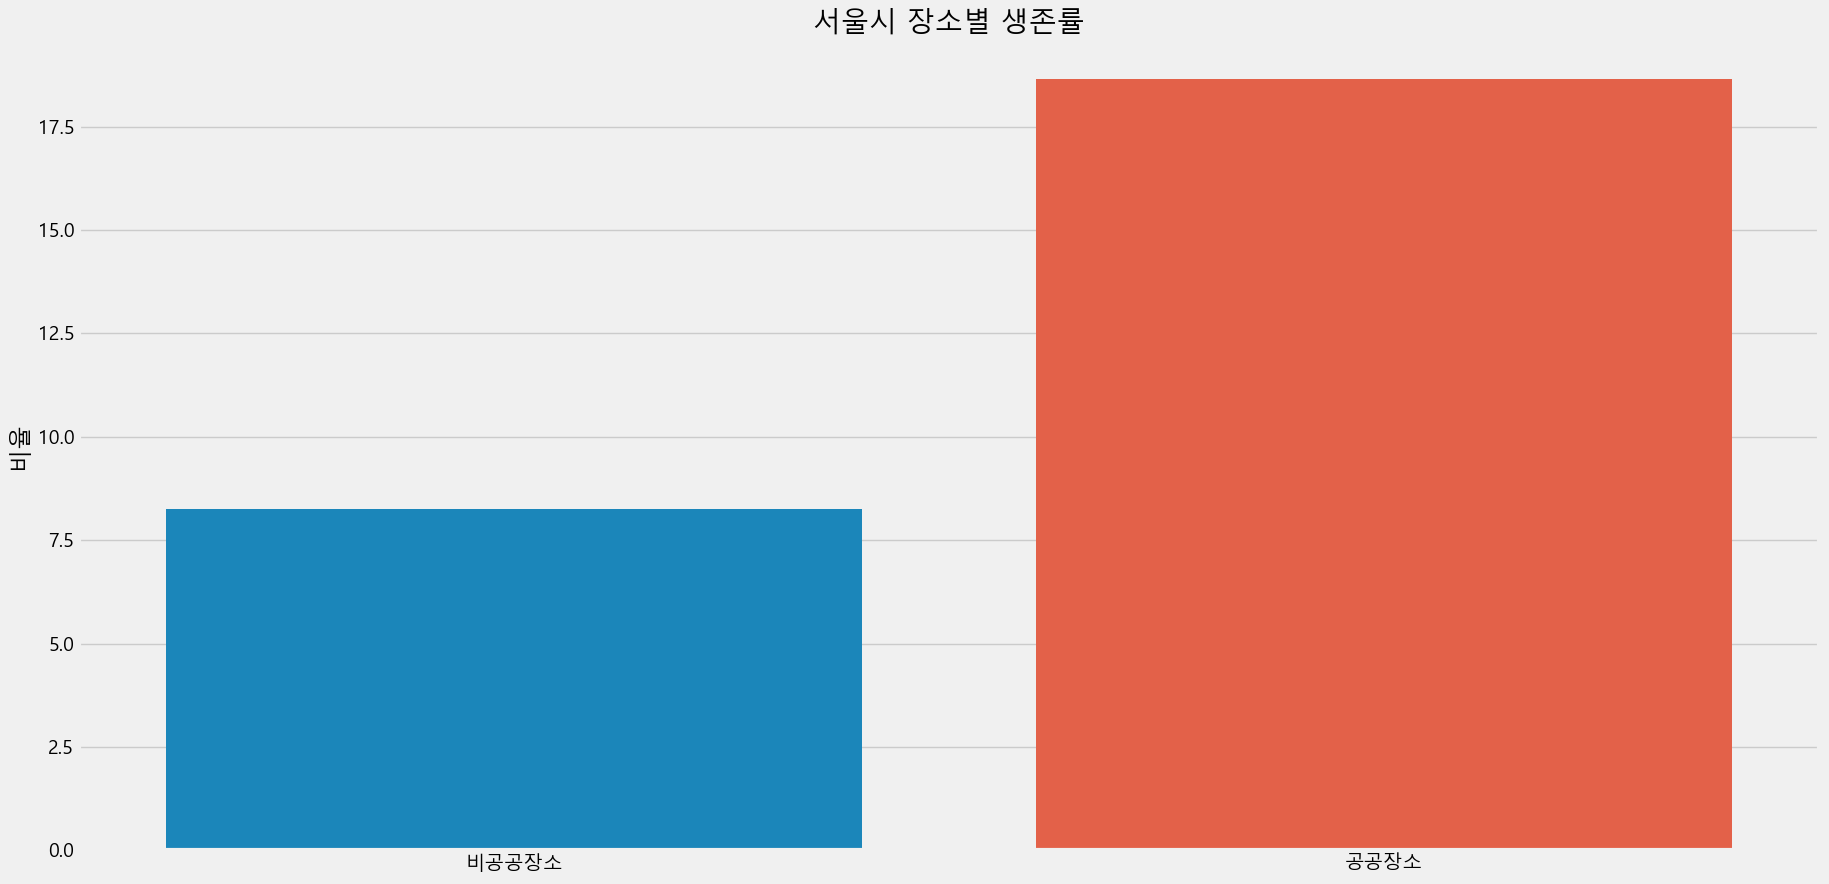

In [46]:
# 한글 깨짐 현상을 방지하기 위해 맑은고딕 폰트와 - 부호 설정
rc('font', family = "Malgun Gothic")
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 스타일 설정
plt.style.use('fivethirtyeight')

# 그래프 그리기 
plt.figure(figsize=(20,10))
sns.barplot(data=place, x=place.index, y='비율')
plt.title('서울시 장소별 생존률')

# 저장 후 주석처리 
# plt.savefig("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_노인인구그래프.png")
plt.show()

In [47]:
seoulgu_alive_arrest_df[seoulgu_alive_arrest_df['P_ADD_DIST']=='미상']
seoulgu_alive_arrest_df.drop([4613], inplace=True)
seoulgu_arrest_df[seoulgu_arrest_df['P_ADD_DIST']=='미상']

,YEAR,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,F_HAPP_ADD_CITY,F_HAPP_ADD_DIST,BYSTANDER_CPR_ELSE,H_PLACE_PUBLIC,ER_RESULT,ADM_RESULT,H2_ER_RESULT,H2_ADM_RESULT
4613,2018,서울,미상,1,47,충북,음성군,NaN,9,21,NaN,NaN,NaN


,YEAR,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,F_HAPP_ADD_CITY,F_HAPP_ADD_DIST,BYSTANDER_CPR_ELSE,H_PLACE_PUBLIC,ER_RESULT,ADM_RESULT,H2_ER_RESULT,H2_ADM_RESULT
4613,2018,서울,미상,1,47,충북,음성군,NaN,9,21,NaN,NaN,NaN
5469,2019,서울,미상,1,65,서울,송파구,1.0,1,30,40.0,NaN,NaN


In [48]:
seoulgu_arrest_df[seoulgu_arrest_df['P_ADD_DIST']=='미상']

,YEAR,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,F_HAPP_ADD_CITY,F_HAPP_ADD_DIST,BYSTANDER_CPR_ELSE,H_PLACE_PUBLIC,ER_RESULT,ADM_RESULT,H2_ER_RESULT,H2_ADM_RESULT
4613,2018,서울,미상,1,47,충북,음성군,NaN,9,21,NaN,NaN,NaN
5469,2019,서울,미상,1,65,서울,송파구,1.0,1,30,40.0,NaN,NaN


In [49]:
seoulgu_arrest_df.drop([4613, 5469], inplace=True)

In [50]:
# alive_rate: 구별 환자의 생존, 사망, 비율에 대한 데이터
alive_rate = pd.DataFrame(seoulgu_alive_arrest_df.groupby('P_ADD_DIST').count()['YEAR'])
alive_rate.reset_index(inplace=True)
alive_rate.rename(columns={'P_ADD_DIST': '소재지',
                           'YEAR': '생존자 수'})
alive_rate['전체 환자 수'] = seoulgu_arrest_df.groupby('P_ADD_DIST').count()['YEAR']

,소재지,생존자 수
0,강남구,63
1,강동구,71
2,강북구,71
3,강서구,79
4,관악구,61
5,광진구,62
6,구로구,55
7,금천구,39
8,노원구,82
9,도봉구,53


In [51]:
total = pd.DataFrame(seoulgu_arrest_df.groupby('P_ADD_DIST').count()['YEAR'])
total.reset_index(inplace=True)

alive_rate['전체 환자 수'] = total['YEAR']
alive_rate.rename(columns={'P_ADD_DIST': '소재지',
                           'YEAR': '생존자 수'}, inplace=True)
alive_rate

,소재지,생존자 수,전체 환자 수
0,강남구,63,581
1,강동구,71,564
2,강북구,71,596
3,강서구,79,752
4,관악구,61,656
5,광진구,62,519
6,구로구,55,611
7,금천구,39,367
8,노원구,82,859
9,도봉구,53,590


In [52]:
alive_rate['생존률'] = alive_rate['생존자 수'] / alive_rate['전체 환자 수']
alive_rate

,소재지,생존자 수,전체 환자 수,생존률
0,강남구,63,581,0.108434
1,강동구,71,564,0.125887
2,강북구,71,596,0.119128
3,강서구,79,752,0.105053
4,관악구,61,656,0.092988
5,광진구,62,519,0.119461
6,구로구,55,611,0.090016
7,금천구,39,367,0.106267
8,노원구,82,859,0.095460
9,도봉구,53,590,0.089831


In [53]:
alive_rate['사망자 수'] = alive_rate['전체 환자 수'] - alive_rate['생존자 수']
alive_rate['사망률'] = alive_rate['사망자 수'] / alive_rate['전체 환자 수']
alive_rate['300m 이내 AED 개수'] = inner_300m_count_pt['300m 이내 AED 개수']
alive_rate

,소재지,생존자 수,전체 환자 수,생존률,사망자 수,사망률,300m 이내 AED 개수
0,강남구,63,581,0.108434,518,0.891566,5.296296
1,강동구,71,564,0.125887,493,0.874113,7.166667
2,강북구,71,596,0.119128,525,0.880872,7.181818
3,강서구,79,752,0.105053,673,0.894947,3.611111
4,관악구,61,656,0.092988,595,0.907012,5.500000
5,광진구,62,519,0.119461,457,0.880539,6.111111
6,구로구,55,611,0.090016,556,0.909984,4.272727
7,금천구,39,367,0.106267,328,0.893733,5.333333
8,노원구,82,859,0.095460,777,0.904540,5.538462
9,도봉구,53,590,0.089831,537,0.910169,5.500000


In [54]:
corr['사망자 수'] = alive_rate['사망자 수']
corr.corr()

,구별 심정지환자수(발생지기준),구별 거주인구 평균,2018~2020 노인인구합계,300m 이내 AED 개수,사망자 수
구별 심정지환자수(발생지기준),1.000000,0.894634,0.910057,-0.353862,0.898458
구별 거주인구 평균,0.894634,1.000000,0.944671,-0.610648,0.805930
2018~2020 노인인구합계,0.910057,0.944671,1.000000,-0.603390,0.905685
300m 이내 AED 개수,-0.353862,-0.610648,-0.603390,1.000000,-0.417670
사망자 수,0.898458,0.805930,0.905685,-0.417670,1.000000


In [55]:
kmeans_df = alive_rate.copy()
kmeans_df
# alive_rate

,소재지,생존자 수,전체 환자 수,생존률,사망자 수,사망률,300m 이내 AED 개수
0,강남구,63,581,0.108434,518,0.891566,5.296296
1,강동구,71,564,0.125887,493,0.874113,7.166667
2,강북구,71,596,0.119128,525,0.880872,7.181818
3,강서구,79,752,0.105053,673,0.894947,3.611111
4,관악구,61,656,0.092988,595,0.907012,5.500000
5,광진구,62,519,0.119461,457,0.880539,6.111111
6,구로구,55,611,0.090016,556,0.909984,4.272727
7,금천구,39,367,0.106267,328,0.893733,5.333333
8,노원구,82,859,0.095460,777,0.904540,5.538462
9,도봉구,53,590,0.089831,537,0.910169,5.500000


In [56]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import seaborn as sns

# normalizer 생성
min_max_scaler = preprocessing.MinMaxScaler()

# 표준화하기
kmeans_df[['300m 이내 AED 개수', '사망자 수']] = min_max_scaler.fit_transform(kmeans_df[['300m 이내 AED 개수', '사망자 수']])

C:\Users\ppi06\anaconda3\envs\data_venv\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([-0.379594  ,  0.64889845])

Text(0.5, 0, '300m 이내 AED 개수(평균)')

Text(0, 0.5, '사망자 수')

Text(0.5, 1.0, 'k=5')

Text(0.4244270380040615, 0.5448154657293498, '강남구')

Text(0.7467362924281984, 0.5008787346221442, '강동구')

Text(0.7493472584856395, 0.5571177504393672, '강북구')

Text(0.1340295909486509, 0.8172231985940246, '강서구')

Text(0.4595300261096605, 0.6801405975395429, '관악구')

Text(0.5648389904264577, 0.437609841827768, '광진구')

Text(0.24804177545691902, 0.6115992970123023, '구로구')

Text(0.43080939947780666, 0.21089630931458697, '금천구')

Text(0.4661578630247037, 1.0, '노원구')

Text(0.4595300261096605, 0.578207381370826, '도봉구')

Text(0.24412532637075718, 0.5448154657293498, '동대문구')

Text(0.27489742633345765, 0.43057996485061506, '동작구')

Text(0.5703095859753822, 0.4499121265377856, '마포구')

Text(0.40783289817232377, 0.4499121265377856, '서대문구')

Text(0.20104438642297645, 0.23022847100175742, '서초구')

Text(0.6605744125326369, 0.3057996485061511, '성동구')

Text(0.18537859007832896, 0.6010544815465728, '성북구')

Text(0.1305483028720626, 0.695957820738137, '송파구')

Text(0.0, 0.46572934973637964, '양천구')

Text(0.6649929704759991, 0.46924428822495606, '영등포구')

Text(0.5949272659455427, 0.23725834797891038, '용산구')

Text(0.1148825065274151, 0.6186291739894552, '은평구')

Text(1.0, 0.11599297012302284, '종로구')

Text(0.5887728459530026, 0.0, '중구')

Text(0.3389033942558746, 0.6221441124780316, '중랑구')

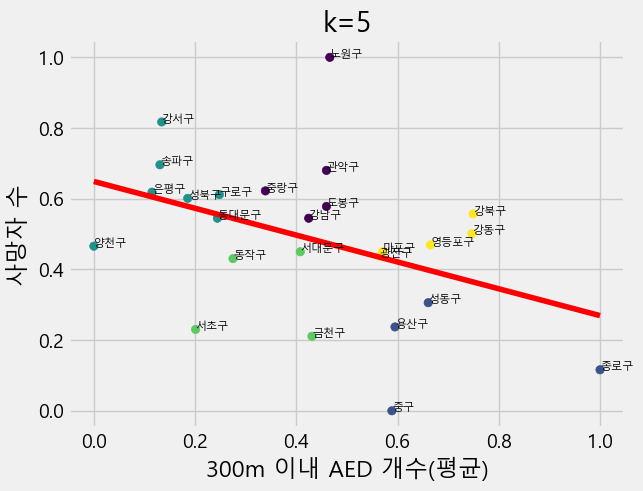

In [57]:
# 클러스터링 생성

estimator = KMeans(n_clusters = 5, init='k-means++', random_state=90)
cluster_ids = estimator.fit_predict(kmeans_df[['300m 이내 AED 개수', '사망자 수']])


plt.scatter(kmeans_df['300m 이내 AED 개수'], kmeans_df['사망자 수'], c=cluster_ids)

fit_line = np.polyfit(kmeans_df['300m 이내 AED 개수'], kmeans_df['사망자 수'], 1)
fit_line
x_minmax = np.array([min(kmeans_df['300m 이내 AED 개수']), max(kmeans_df['300m 이내 AED 개수'])]) # x축 최소값, 최대값
fit_y = x_minmax * fit_line[0] + fit_line[1]
plt.plot(x_minmax, fit_y, color = 'red')

# plt.legend()
plt.xlabel("300m 이내 AED 개수(평균)")
plt.ylabel("사망자 수")
plt.title('k=5')

# for index, mark, attended in kmeans_df.itertuples():
#     plt.annotate(index, (attended, mark))
for i in range(len(kmeans_df)): # 행 개수만큼 순회
    row = kmeans_df.iloc[i] # 한 행씩 꺼내기
    name = row['소재지'] # 이름이 저장된 열
    x = row['300m 이내 AED 개수'] # x좌표가 저장된 열
    y = row['사망자 수'] # y좌표가 저장된 열

    plt.text(x, y, name, fontsize=8) # x 좌표, y좌표, 이름 순서로 input 지정

plt.show()

In [58]:
kmeans_df

,소재지,생존자 수,전체 환자 수,생존률,사망자 수,사망률,300m 이내 AED 개수
0,강남구,63,581,0.108434,0.544815,0.891566,0.424427
1,강동구,71,564,0.125887,0.500879,0.874113,0.746736
2,강북구,71,596,0.119128,0.557118,0.880872,0.749347
3,강서구,79,752,0.105053,0.817223,0.894947,0.134030
4,관악구,61,656,0.092988,0.680141,0.907012,0.459530
5,광진구,62,519,0.119461,0.437610,0.880539,0.564839
6,구로구,55,611,0.090016,0.611599,0.909984,0.248042
7,금천구,39,367,0.106267,0.210896,0.893733,0.430809
8,노원구,82,859,0.095460,1.000000,0.904540,0.466158
9,도봉구,53,590,0.089831,0.578207,0.910169,0.459530


In [59]:
corr.corr()

,구별 심정지환자수(발생지기준),구별 거주인구 평균,2018~2020 노인인구합계,300m 이내 AED 개수,사망자 수
구별 심정지환자수(발생지기준),1.000000,0.894634,0.910057,-0.353862,0.898458
구별 거주인구 평균,0.894634,1.000000,0.944671,-0.610648,0.805930
2018~2020 노인인구합계,0.910057,0.944671,1.000000,-0.603390,0.905685
300m 이내 AED 개수,-0.353862,-0.610648,-0.603390,1.000000,-0.417670
사망자 수,0.898458,0.805930,0.905685,-0.417670,1.000000


In [60]:
output = alive_rate.copy()
output['군집'] = cluster_ids
output.pivot_table(columns='군집',
                   values=['사망자 수', '300m 이내 AED 개수'],
                   aggfunc='mean')

군집,0,1,2,3,4
300m 이내 AED 개수,5.326952,6.959686,3.709596,4.740476,6.658952
사망자 수,597.800000,301.750000,562.000000,396.000000,482.800000


## 1번 군집이 300m 이내 AED개수 가장 많고, 사망자 수 가장 적음
## 0번, 2번 군집에 대해 추가 설치

In [61]:
x1 = corr.corr()['구별 심정지환자수(발생지기준)']['구별 거주인구 평균']
x2 = corr.corr()['구별 심정지환자수(발생지기준)']['2018~2020 노인인구합계']

w1 = x1 * (1/(x1+x2))
w2 = x2 * (1/(x1+x2))
print('구별 거주인구 평균 weight:', w1)
print('2018~2020 노인인구합계 weight:', w2)

x = population['구별 거주인구 평균']*w1 + senior['2018~2020 노인인구합계'] * w2
y = arrest['구별 심정지환자수(발생지기준)']

population_senior = pd.DataFrame(x)
population_senior.index = arrest['소재지']
population_senior.columns = ['거주인구, 노인인구 가중치 합']
population_senior.reset_index(inplace=True)
population_senior['구별 심정지환자수'] = y
population_senior['300m 이내 AED 개수'] = alive_rate['300m 이내 AED 개수']
population_senior['군집'] = cluster_ids

구별 거주인구 평균 weight: 0.4957269899402968
2018~2020 노인인구합계 weight: 0.5042730100597032


In [62]:
output = alive_rate.copy()
output['군집'] = cluster_ids
output['거주인구, 노인인구 가중치 합'] = population_senior['거주인구, 노인인구 가중치 합']
output.pivot_table(columns='군집',
                   values=['사망자 수', '300m 이내 AED 개수', '거주인구, 노인인구 가중치 합'],
                   aggfunc='mean')
output
# population_senior

군집,0,1,2,3,4
300m 이내 AED 개수,5.326952,6.959686,3.709596,4.740476,6.658952
"거주인구, 노인인구 가중치 합",338158.534952,155617.010288,355602.271877,254191.643160,275482.407302
사망자 수,597.800000,301.750000,562.000000,396.000000,482.800000


,소재지,생존자 수,전체 환자 수,생존률,사망자 수,사망률,300m 이내 AED 개수,군집,"거주인구, 노인인구 가중치 합"
0,강남구,63,581,0.108434,518,0.891566,5.296296,0,378596.490065
1,강동구,71,564,0.125887,493,0.874113,7.166667,4,317591.193671
2,강북구,71,596,0.119128,525,0.880872,7.181818,4,249062.494318
3,강서구,79,752,0.105053,673,0.894947,3.611111,2,422503.130080
4,관악구,61,656,0.092988,595,0.907012,5.500000,0,369173.508301
5,광진구,62,519,0.119461,457,0.880539,6.111111,4,253784.725408
6,구로구,55,611,0.090016,556,0.909984,4.272727,2,314977.714816
7,금천구,39,367,0.106267,328,0.893733,5.333333,3,180949.174287
8,노원구,82,859,0.095460,777,0.904540,5.538462,0,389145.079867
9,도봉구,53,590,0.089831,537,0.910169,5.500000,0,255063.328937


In [63]:
# 안전군집(1번) 거주인구, 노인인구 대비 사망자수
safe_rate = 155617.010288 / 301.750000
danger_rate_0 = 338158.534952 / 597.800000
danger_rate_2 = 355602.271877 / 562.000000

appropriate_aed_cluster0 = 6.959686 * danger_rate_0 / safe_rate
appropriate_aed_cluster2 = 6.959686 * danger_rate_2 / safe_rate

print('0번 군집 적정 AED 개수:', appropriate_aed_cluster0)
print('2번 군집 적정 AED 개수:', appropriate_aed_cluster2)

0번 군집 적정 AED 개수: 7.63386191473243
2번 군집 적정 AED 개수: 8.539020746662862


In [64]:
population_senior_sorted = population_senior.sort_values('거주인구, 노인인구 가중치 합', ascending=False)
population_senior_sorted.reset_index(drop=True, inplace=True)
requires_additional_installation = population_senior_sorted[(population_senior_sorted['군집']==0) | (population_senior_sorted['군집']==2)]
requires_additional_installation

,소재지,"거주인구, 노인인구 가중치 합",구별 심정지환자수,300m 이내 AED 개수,군집
0,송파구,467439.937304,760,3.590909,2
1,강서구,422503.130080,743,3.611111,2
2,노원구,389145.079867,775,5.538462,0
3,강남구,378596.490065,662,5.296296,0
4,관악구,369173.508301,593,5.500000,0
5,은평구,363092.627008,584,3.500000,2
6,성북구,329877.074824,570,3.909091,2
7,양천구,322494.641718,491,2.833333,2
9,구로구,314977.714816,557,4.272727,2
11,중랑구,298814.267589,541,4.800000,0


In [65]:
cluster0 = population_senior_sorted[(population_senior_sorted['군집']==0)]
cluster0['추가로 설치해야되는 300m 이내 AED 개수'] = 7.63386191473243 - cluster0['300m 이내 AED 개수']
cluster0

C:\Users\ppi06\AppData\Local\Temp\ipykernel_24012\584909509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster0['추가로 설치해야되는 300m 이내 AED 개수'] = 7.63386191473243 - cluster0['300m 이내 AED 개수']


,소재지,"거주인구, 노인인구 가중치 합",구별 심정지환자수,300m 이내 AED 개수,군집,추가로 설치해야되는 300m 이내 AED 개수
2,노원구,389145.079867,775,5.538462,0,2.095400
3,강남구,378596.490065,662,5.296296,0,2.337566
4,관악구,369173.508301,593,5.500000,0,2.133862
11,중랑구,298814.267589,541,4.800000,0,2.833862
16,도봉구,255063.328937,552,5.500000,0,2.133862


In [66]:
cluster2 = population_senior_sorted[(population_senior_sorted['군집']==2)]
cluster2['추가로 설치해야되는 300m 이내 AED 개수'] = 8.539020746662862 - cluster2['300m 이내 AED 개수']
cluster2

C:\Users\ppi06\AppData\Local\Temp\ipykernel_24012\833448838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster2['추가로 설치해야되는 300m 이내 AED 개수'] = 8.539020746662862 - cluster2['300m 이내 AED 개수']


,소재지,"거주인구, 노인인구 가중치 합",구별 심정지환자수,300m 이내 AED 개수,군집,추가로 설치해야되는 300m 이내 AED 개수
0,송파구,467439.937304,760,3.590909,2,4.948112
1,강서구,422503.130080,743,3.611111,2,4.927910
5,은평구,363092.627008,584,3.500000,2,5.039021
6,성북구,329877.074824,570,3.909091,2,4.629930
7,양천구,322494.641718,491,2.833333,2,5.705687
9,구로구,314977.714816,557,4.272727,2,4.266293
15,동대문구,268830.777390,557,4.250000,2,4.289021


In [67]:
requires_additional_installation = pd.concat([cluster0,cluster2])
requires_additional_installation.reset_index(inplace=True, drop=True)

In [68]:
requires_additional_installation

,소재지,"거주인구, 노인인구 가중치 합",구별 심정지환자수,300m 이내 AED 개수,군집,추가로 설치해야되는 300m 이내 AED 개수
0,노원구,389145.079867,775,5.538462,0,2.095400
1,강남구,378596.490065,662,5.296296,0,2.337566
2,관악구,369173.508301,593,5.500000,0,2.133862
3,중랑구,298814.267589,541,4.800000,0,2.833862
4,도봉구,255063.328937,552,5.500000,0,2.133862
5,송파구,467439.937304,760,3.590909,2,4.948112
6,강서구,422503.130080,743,3.611111,2,4.927910
7,은평구,363092.627008,584,3.500000,2,5.039021
8,성북구,329877.074824,570,3.909091,2,4.629930
9,양천구,322494.641718,491,2.833333,2,5.705687


In [69]:
# 한글폰트사용
from matplotlib import font_manager,rc
font_path = "C:/sooeun/DATAexam/전공프로젝트(빅데이터)/a타이틀고딕2.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()

plt.style.use("default")
plt.rc('font', family = font_name)
plt.rcParams['axes.unicode_minus'] = False

Text(0.5, 1.0, '추가로 설치해야되는 300m 이내 AED 개수')

Text(0.5, 0, '서울시 자치구')

Text(0, 0.5, 'AED 추가설치 개수')

Text(0, 6, '2.34')

Text(0, 6, '4.93')

Text(0, 6, '2.13')

Text(0, 6, '4.27')

Text(0, 6, '2.1')

Text(0, 6, '2.13')

Text(0, 6, '4.29')

Text(0, 6, '4.63')

Text(0, 6, '4.95')

Text(0, 6, '5.71')

Text(0, 6, '5.04')

Text(0, 6, '2.83')

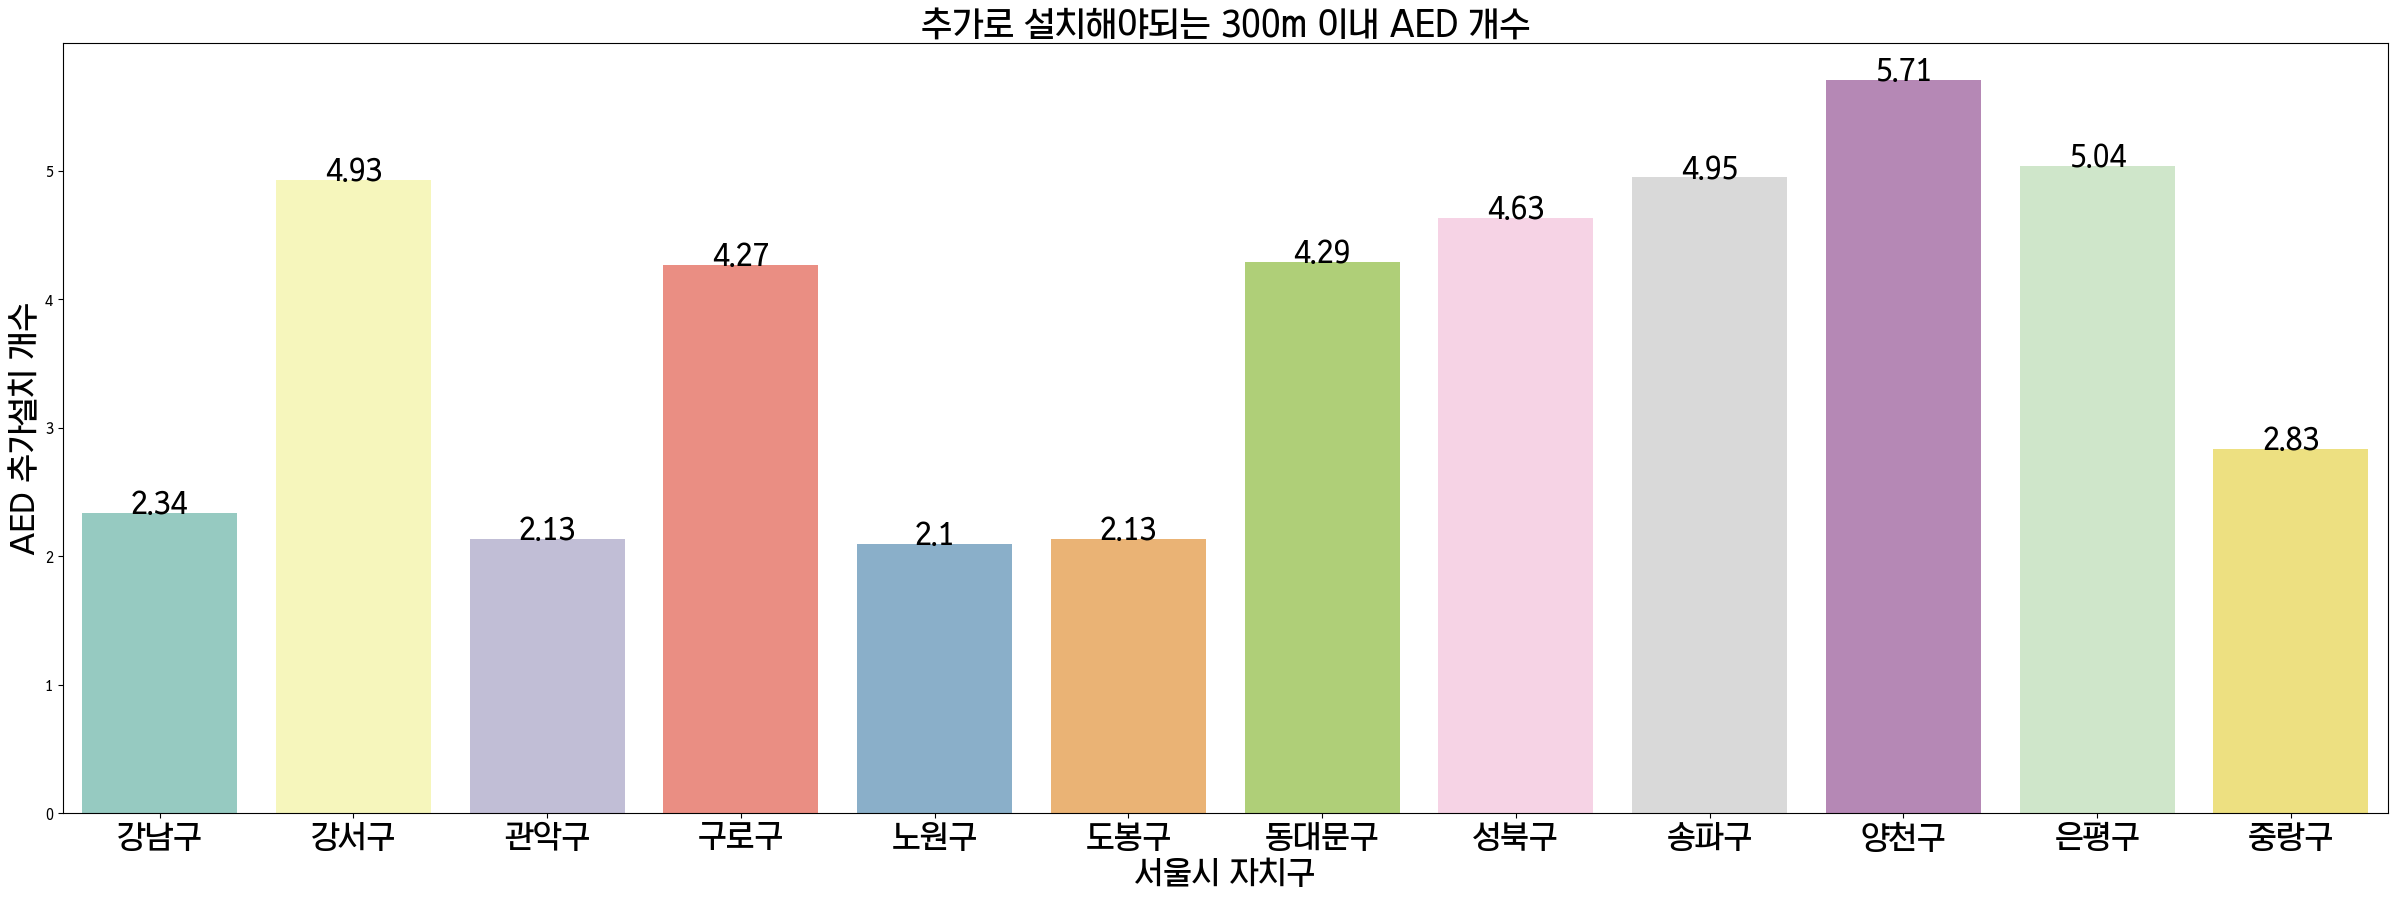

In [70]:
# 구 별 더 설치해야하는 AED 개수 그래프 
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)


splot = sns.barplot(data=requires_additional_installation, x=requires_additional_installation.소재지.sort_values(), y='추가로 설치해야되는 300m 이내 AED 개수', palette="Set3")
ax.set_title('추가로 설치해야되는 300m 이내 AED 개수', size = 25)
ax.set_xlabel("서울시 자치구", size = 23)
ax.set_ylabel("AED 추가설치 개수",size = 23)
ax.tick_params(axis="x", labelsize=23)

## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(bar.get_height().round(2)), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=21, xytext=(0, 6),
                   textcoords='offset points')
    
plt.savefig("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_AED_추가설치.png")
plt.show()